Упражнение 4.1. Найти параметрические уравнения прямой, прямой, проходящей через точки (1,0) и (5,3).

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

p1, p2 = sp.Point(1, 0), sp.Point(5, 3) 
L = sp.Line(p1, p2)

L.equation()
print(L.arbitrary_point()[0])
print(L.arbitrary_point()[1])

4*t + 1
3*t


In [190]:
# Пример 2 
# Найти уравнение прямой, проходящей через точку (–2,3) с угловым коэффициентом, равным 2.
A = sp.Point(-2,3) 
к = 2
L = sp.Line(A, slope = к) 
print(L.equation())

-2*x + y - 7


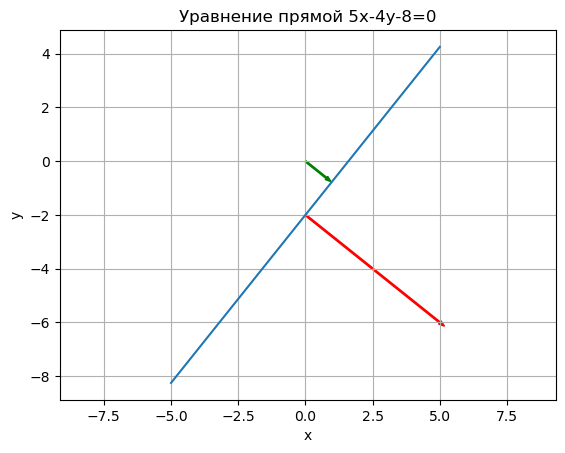

In [191]:
# Пример 3. Построить прямую, заданную общим уравнением 5x-4y-8=0-5x-4y-8=0 на отрезке [–5,5]. 
# В качестве заголовка задать общее уравнение данной прямой: 
# (>>plt.title('Уравнение прямой 5x-4y-8=0')). Изобразить на графике:
# а) вектор n(A, B), берущий начало из точки (0, –2);
# б) орт вектора n, берущий начало из точки (0,0).

x = np.linspace(-5, 5, 100) # создаёт массив с нижней границей -5 
# и верхней границей 5, в созданном массиве 100 элементов
n = [5, -4] # нормаль прямой
ortN = n/np.linalg.norm(n) # создаем орт - вектор единичной длины


plt.subplot()
plt.plot(x, (5*x - 8)/4) # построение графика функции y=(5x-8)/4
# построение векторов
plt.arrow(0, -2, n[0], n[1], width=0.05, color='Red')
plt.arrow(0, 0, ortN[0], ortN[1], width=0.05, color='Green')


plt.title('Уравнение прямой 5x-4y-8=0')
plt.xlabel('x')
plt.ylabel('y')
plt.grid ()
plt.axis('equal')
plt.show()

Упражнение 4.2. Найти расстояние от точки (-1,1) до прямой проходящей через точки (1,4) и (5,3).

In [192]:
line = sp.Line((1,4), (5,3))
p = sp.Point(-1, 1)

line.distance(p)

14*sqrt(17)/17

In [193]:
# Пример 4. Найти угол между прямыми, проходящими через точки (0,0), (1,0) и (1,1), (0,0).
# Найти наименьший по величине угол.
e = sp.Line((0, 0), (1, 0)) 
w = sp.Line((1, 1), (0, 0)) 
s1 = w.angle_between(e)
s2 = w.smallest_angle_between(e)
[s1, s2]


[3*pi/4, pi/4]

Упражнение 4.3. Прямая L1 проходит через точки (0,0) и (2,3).<br>Найти уравнение прямой L2, параллельной прямой L1 и проходящей через точку (–2,2). <br>Найти уравнение прямой L3, перпендикулярной прямой L1 и проходящей через точку (–2,2). Сделать рисунок.


[3*x/2]
[3*x/2 + 5]
[2/3 - 2*x/3]


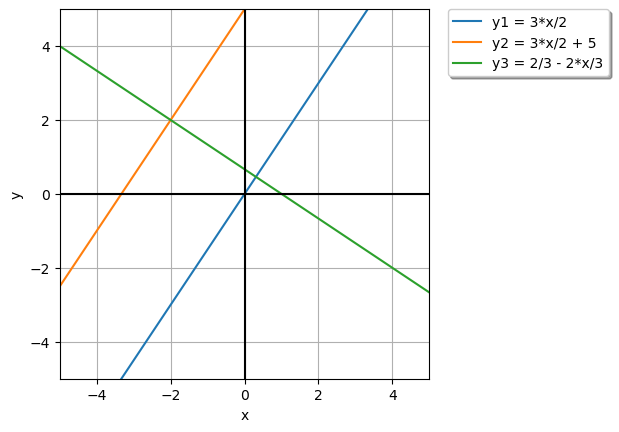

In [194]:
l1 = sp.Line((0, 0), (2, 3))
l2 = l1.parallel_line(sp.Point(-2, 2))
l3 = l1.perpendicular_line(sp.Point(-2, 2))

x, y = sp.symbols('x y')

x_values = np.linspace(-10, 10, 100)

l1_eq = l1.equation(x, y)
l1_subs = [l1_eq.subs(x, m) for m in x_values] # подставляем x
y1_values = [sp.solve(m, y) for m in l1_subs] # выражаем y1

l2_eq = l2.equation(x, y)
l2_subs = [l2_eq.subs(x, m) for m in x_values] # подставляем x
y2_values = [sp.solve(m, y) for m in l2_subs] # выражаем y2

l3_eq = l3.equation(x, y)
l3_subs = [l3_eq.subs(x, m) for m in x_values] # подставляем x
y3_values = [sp.solve(m, y) for m in l3_subs] # выражаем y3

print(sp.solve(l1_eq, y))
print(sp.solve(l2_eq, y))
print(sp.solve(l3_eq, y))

plt.plot(x_values, y1_values, label=(f'y1 = {sp.solve(l1_eq, y)[0]}'))
plt.plot(x_values, y2_values, label=(f'y2 = {sp.solve(l2_eq, y)[0]}'))
plt.plot(x_values, y3_values, label=(f'y3 = {sp.solve(l3_eq, y)[0]}'))

plt.axis('square')

plt.axhline(y=0, color='k') 
plt.axvline(x=0, color='k') 

plt.xlabel('x')
plt.ylabel('y')

plt.axis([-5,5,-5,5])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)

plt.grid()

plt.show()

Упражнение 4.4. Спроектировать точку (0.5, 0) на прямую x-y=0.

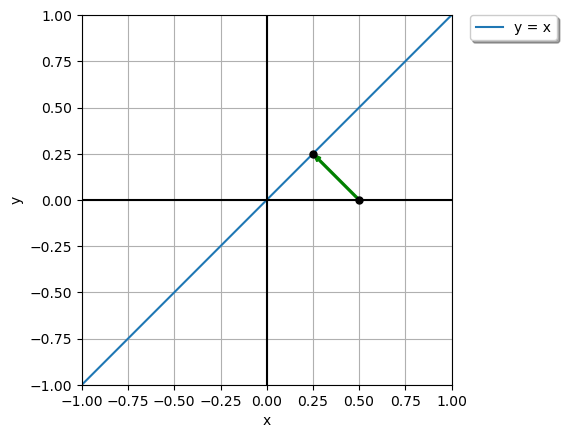

In [195]:
x, y = sp.symbols('x y')

y_func = x

p1 = sp.Point(0, y_func.subs(x , 0))
p2 = sp.Point(1, y_func.subs(x , 1))

L = sp.Line(p1, p2)
proj = L.projection(sp.Point(0.5, 0))

x_values = np.linspace(-10, 10, 100)

L_eq = L.equation(x, y)
L_subs = [L_eq.subs(x, m) for m in x_values] # подставляем x
y_values = [sp.solve(m, y) for m in L_subs] # выражаем y
plt.plot(x_values, y_values, label=(f'y = {sp.solve(L_eq, y)[0]}'))

plt.plot(proj[0], proj[1],'ok',markersize=5)
plt.plot(0.5, 0,'ok',markersize=5)

dx = float(proj[0].evalf())
dy = float(proj[1].evalf())
plt.arrow(0.5, 0, dx - 0.5, dy, width=0.01, color='Green', length_includes_head=True)

plt.axis('square')

plt.axhline(y=0, color='k') 
plt.axvline(x=0, color='k') 

plt.xlabel('x')
plt.ylabel('y')

plt.axis([-1,1,-1,1])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)

plt.grid()

plt.show()


Пример 5. Построить прямую, проходящую через точку M0(0.6,–0.4) перпендикулярно вектору n(-3,3).<br>На график нанести точку M0 и нормальный вектор, вывести обозначение заданной точки (>> plt.text(0.6,-0.4,'$M_0(x_0,y_0)$').<br>В качестве заголовка задать общее уравнение данной прямой.

-2*x - 2*y + 2/5


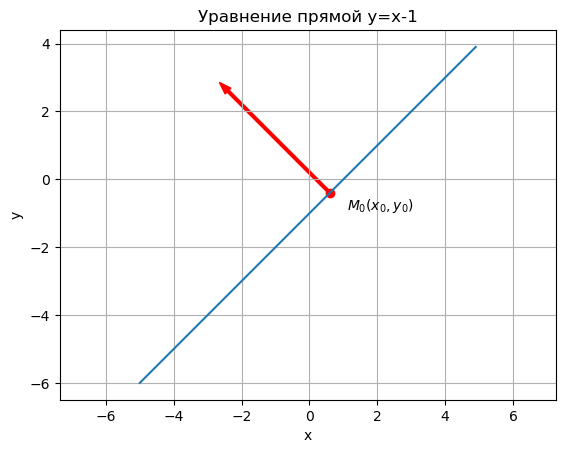

In [196]:
t1, t2, t3 = sp.Point(0.6, -0.4), sp.Point(0, 0), sp.Point(-2, 2) 
H1 = sp.Line(t2, t3) 
H2 = H1.parallel_line(t1)
H2 = H2.equation()
print(H2)

x = np.arange(-5, 5, 0.1)
n = [-3, 3]
M0 = [0.6, -0.4]
y = x-1

plt.plot(M0[0], M0[1],'or')
plt.arrow(M0[0], M0[1], n[0], n[1], width=0.08, color='Red')
plt.plot(x, y)

plt.text(M0[0] + 0.5, M0[1] - 0.5,'$M_0(x_0,y_0)$')
plt.title('Уравнение прямой y=x-1')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid()
plt.show()

Упражнение 4.5. Построить прямую, проходящую через точку M(0.6,–0.4) параллельно вектору q-3,3.<br>Сделать рисунок (изобразите вектор q с началом в точке (0,–2). При решении использовать метод parallel_line.


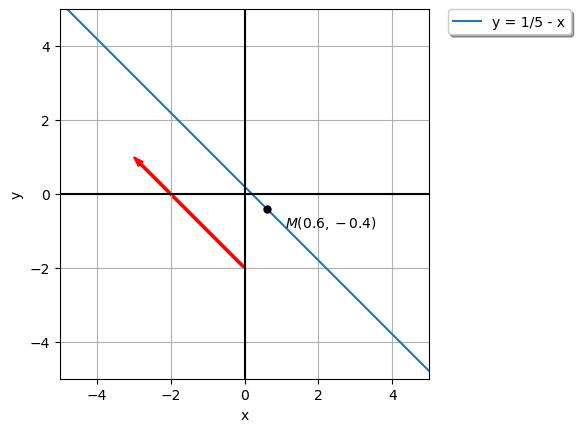

In [197]:
q = [-3, 3]
p = [0, -2]

p0 = sp.Point(p[0], p[1])
p_q = sp.Point(q[0], q[1])

x, y = sp.symbols('x y')

M = sp.Point(0.6, -0.4)

# объект линии, совпадающей с вектором q
line_q = sp.Line(p0, p0 + p_q)
paral_line = line_q.parallel_line(M)

x_values = np.linspace(-5, 5, 100)

# Находим точки прямой
paral_line_eq = paral_line.equation(x, y)
paral_line_subs = [paral_line_eq.subs(x, m) for m in x_values] # подставляем x
y_values = [sp.solve(m, y) for m in paral_line_subs] # выражаем y

# Рисуем параллельную прямую
plt.plot(x_values, y_values, label=(f'y = {sp.solve(paral_line_eq, y)[0]}'))

# Рисуем вектор q
plt.arrow(p[0], p[1], q[0], q[1], width=0.06, color='Red', length_includes_head=True)

# Ставим точку М
plt.plot(M[0], M[1],'ok',markersize=5)

plt.text(M[0] + 0.5, M[1] - 0.5,'$M(0.6, -0.4)$')

plt.axis('square')

plt.axhline(y=0, color='k') 
plt.axvline(x=0, color='k') 

plt.xlabel('x')
plt.ylabel('y')

plt.axis([-5,5,-5,5])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)

plt.grid()

plt.show()


Неверный код из методички:

Пример 6. Построить прямую, заданную параметрическим уравнением {x=-1+4t, y=3-3t. {x=-1+5t y=3-2t<br>Найти ее направляющий q и нормальный nn векторы. Проверить их ортогональность. Найти расстояние от прямой до точки N(–4,–1). <br>Изобразить данные векторы исходящими из какой-нибудь точки, не лежащей на прямой. 


In [198]:
# t = np.arange(-3, 3, 0.1)
# M0 = [-1, 3]
# N = [-4, -1]
# q = [4, -3] # направляющий вектор из условия
# n = [3, 4] # нормальный вектор подбираем
# s_p = np.dot(n, q) # проверка ортогональности
# print('Скалярное произведение векторов (n,q) =', s_p)

# x = M0[0] + q[0] * t # массив значений х
# y = M0[1] + q[1] * t # массив значений у

# M = sp.Point(3.0, 0.0) # возьмем еще одну точку на прямой (при t=1)
# s = sp.Line(M, M0)
# D = s.distance(N)
# print('Расстояние от точки N до прямой =',D)


# plt.plot(x, y)
# plt.plot(M0[0], M0[1],'or',N[0], N[1],'oy',M[0], M[1],'ok')
# plt.text(M0[0] + 0.8, M0[1] - 0.5,'$M_0(-1,3)$')
# plt.text(M[0] + 0.8, M[1] - 0.5,'$M_1(3,0)$')
# plt.text(N[0] + 0.8, N[1] - 0.5,'$N(-4,-1)$')
# # из точки N строим векторы n и q
# plt.arrow(0, 10, n[0], n[1], width=0.08,color='g')
# plt.arrow(0, 10, q[0], q[1], width=0.08, color='g')
# plt.title(f'Уравнение прямой x={M0[0]}+{q[0]}t, y={M0[1]}-{-q[1]}t')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.grid()
# plt.axis('square')
# plt.show()
